In [1]:
import pandas as pd

In [2]:
# Read csv file

titanic = pd.read_csv('Pandas_Data\\titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [3]:
# data head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
# data info

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [5]:
# data columns

titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [6]:
# column length

len(titanic.columns), titanic.shape[1]

(9, 9)

In [7]:
# with iloc filter data

titanic_slice = titanic.iloc[:10,[2,3]]
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


### GroupBy

`groupby is done by using ASCII`

In [8]:
# dataframe groupby sex column

titanic_slice.groupby('sex')

In [9]:
# dataframe groupby sex column 

slice_groupby = titanic_slice.groupby('sex')
slice_groupby

In [10]:
list(slice_groupby)

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [11]:
# call groups of DataFrameGroupBy object
# As it is a dictionary it is not callable

slice_groupby.groups()

TypeError: 'PrettyDict' object is not callable

In [12]:
# extract groups of DataFrameGroupBy object

slice_groupby.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [13]:
# dict slicing

slice_groupby.groups['female']

Index([1, 2, 3, 8, 9], dtype='int64')

In [14]:
# view item wise dict

slice_groupby.groups.items()

dict_items([('female', Index([1, 2, 3, 8, 9], dtype='int64')), ('male', Index([0, 4, 5, 6, 7], dtype='int64'))])

In [15]:
# convert it into list

list(slice_groupby.groups.items())

[('female', Index([1, 2, 3, 8, 9], dtype='int64')),
 ('male', Index([0, 4, 5, 6, 7], dtype='int64'))]

In [16]:
# slicing the list

s = list(slice_groupby)
s[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [17]:
# type of the 0th element of the list

type(s[0])

tuple

In [18]:
# slicing

s[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [19]:
# slicing by iloc

s[0][1].iloc[3,:]

sex    female
age      27.0
Name: 8, dtype: object

In [20]:
# filte the female data

titanic_slice_f = titanic_slice.loc[titanic_slice['sex'] == 'female']
titanic_slice_f

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [21]:
# check two conditions by equals

titanic_slice_f.equals(s[0][1])

True

In [22]:
# iterating the generator by for loop

for i in slice_groupby:
    print(i)

('female',       sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0)
('male',     sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0)


In [23]:
# iterating the generator by for loop

for i in slice_groupby:
    print(i[0])

female
male


In [24]:
# iterating the generator by for loop

for i in slice_groupby:
    print(i[1])

      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0
    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


In [25]:
# iterating the generator by for loop and appending it into a list

lst = []

for i in slice_groupby:
    lst.append(i[1])
    
print(lst)
print('\n')
print(lst[0])
print('\n')
print(lst[1])

[      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0,     sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0]


      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0


    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


### splitting with many keys

In [26]:
# Read csv file

summer = pd.read_csv('Pandas_Data\\summer.csv')
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [27]:
# Number of unique elements of each column in a dataframe

summer.nunique()

Year             27
City             22
Sport            43
Discipline       67
Athlete       22762
Country         147
Gender            2
Event           666
Medal             3
dtype: int64

In [28]:
# Number of unique elements of column country

summer['Country'].nunique()

147

In [29]:
# extract the dataframe groupby country

summer_country = list(summer.groupby('Country'))
summer_country

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [30]:
# len of the dataframe groupby country

len(summer_country)

147

In [31]:
# slicing

summer_country[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [32]:
# group by country and gender

summer_CG = list(summer.groupby(['Country', 'Gender']))
summer_CG

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [33]:
# len, dtypes

len(summer_CG), type(summer_CG), type(summer_CG[105]), type(summer_CG[105][0]), type(summer_CG[105][1])

(236, list, tuple, tuple, pandas.core.frame.DataFrame)

In [34]:
# slicing

summer_CG[99][0]

('IND', 'Women')

In [35]:
# slicing

summer_CG[99][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
25113,2000,Sydney,Weightlifting,Weightlifting,"MALLESWARI, Karnam",IND,Women,69KG,Bronze
29795,2012,London,Badminton,Badminton,"NEHWAL, Saina",IND,Women,Singles,Bronze
29879,2012,London,Boxing,Boxing,"KOM, Mary",IND,Women,51 KG,Bronze


### split-apply-combine

In [36]:
# data head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [37]:
# slice data first 10 row and 2,3 column

titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [38]:
# group data by sex column

list(titanic_slice.groupby('sex'))

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [39]:
# slicing

list(titanic_slice.groupby('sex'))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [40]:
# slicing

list(titanic_slice.groupby('sex'))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [42]:
# calculate mean of groupd data by sex column

titanic_slice.groupby('sex').mean()

,age
sex,
female,28.00
male,28.25


In [43]:
# calculate sum of groupd data by sex column

titanic_slice.groupby('sex').sum()

,age
sex,
female,140.0
male,113.0


In [45]:
# count of survived female

list(titanic.groupby(['sex']))[0][1]['survived'].sum()

233

In [46]:
# count of survived male

list(titanic.groupby(['sex']))[1][1]['survived'].sum()

109

In [47]:
# count of survived female and male

titanic.groupby(['sex'])['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [48]:
# count of survived(1) and unsurvived(0) of female and male

titanic.groupby(['sex'])['survived'].value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [49]:
# count of survived(1) and unsurvived(0) of female and male

titanic.groupby(['sex'])['survived'].value_counts().unstack()

survived,0,1
sex,,
female,81,233
male,468,109


In [50]:
# filter max of fare and age, gender wise

round(titanic.groupby(['sex'])[['fare','age']].max(),2)

,fare,age
sex,,
female,512.33,63.0
male,512.33,80.0


In [51]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [52]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [53]:
titanic.groupby('sex')[titanic.select_dtypes(exclude= 'O').columns].mean()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [58]:
# calculate mean by sex column

titanic_sex_mean = titanic.groupby(['sex']).mean()
titanic_sex_mean

TypeError: agg function failed [how->mean,dtype->object]

In [62]:
# calculate mean by sex column

titanic_sex_mean = titanic.groupby(['sex'])[['survived', 'age', 'fare']].mean()
titanic_sex_mean

,survived,age,fare
sex,,,
female,0.742038,27.915709,44.479818
male,0.188908,30.726645,25.523893


In [55]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # change style for the graph visualization

In [56]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

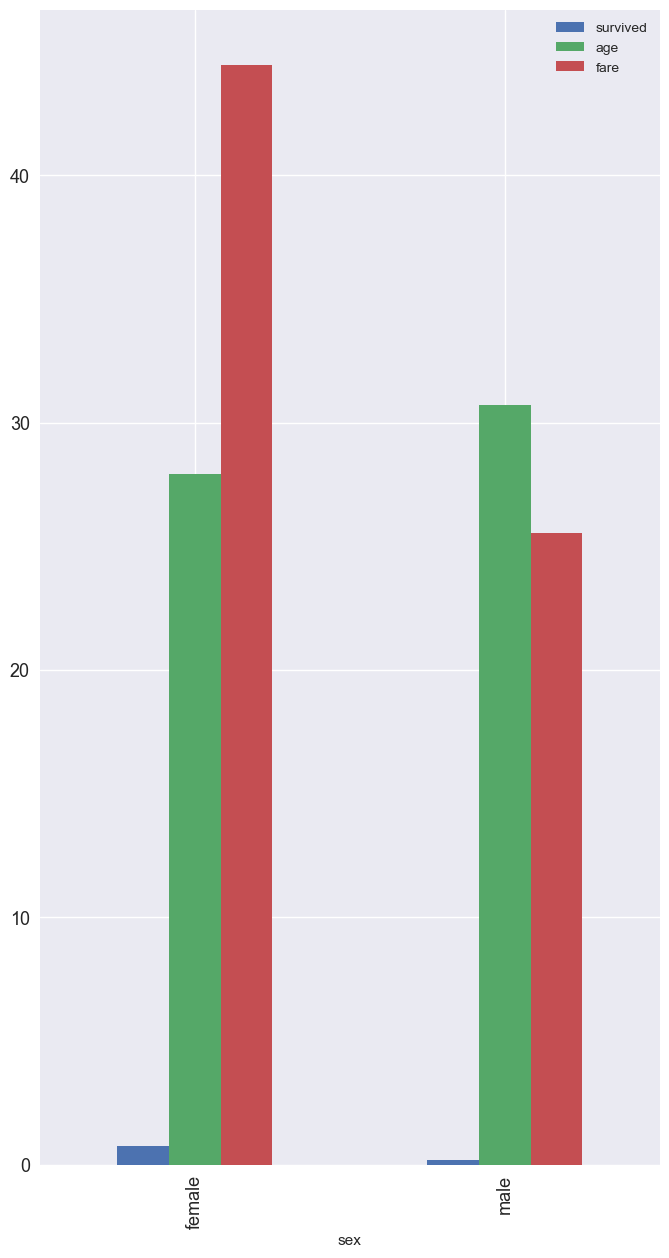

In [63]:
# plot data on bar chart where subplots= False, figsize= (8,15), fontsize= 13
# subplots false means plot all data together

titanic_sex_mean.plot(kind= 'bar', subplots= False, figsize= (8,15), fontsize= 13)
plt.show()

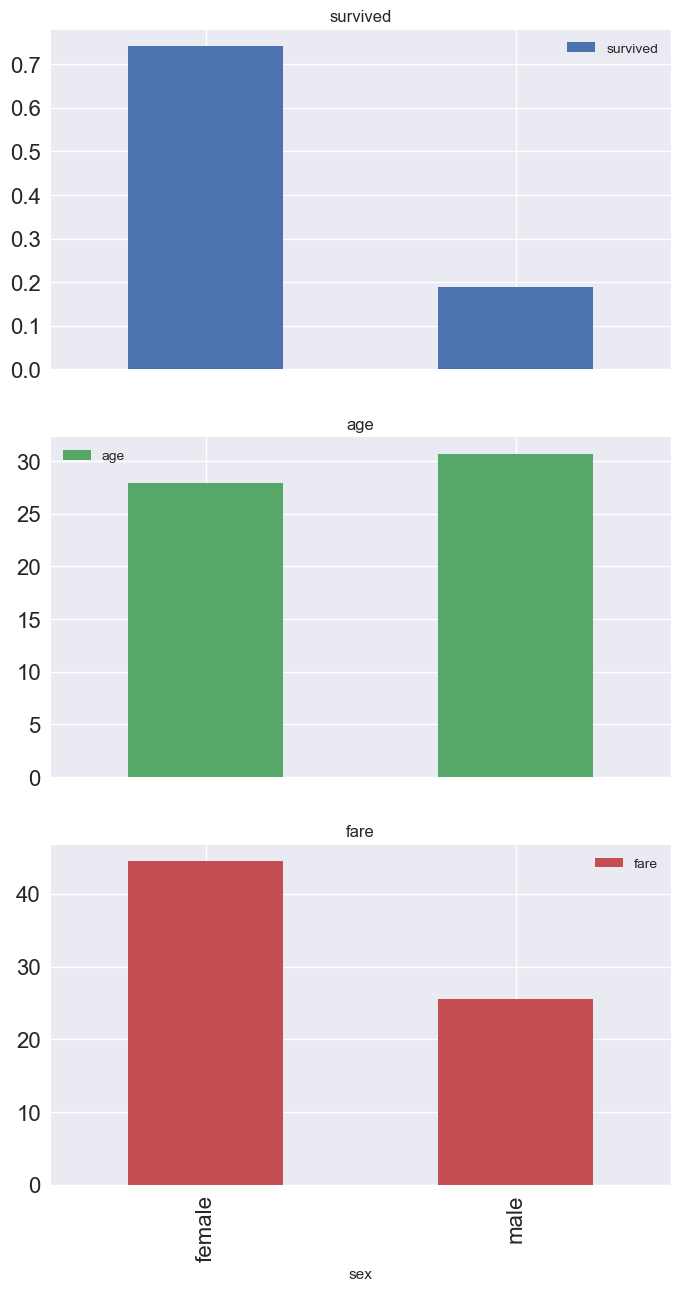

In [64]:
# plot data on bar chart where subplots= True, figsize= (8,15), fontsize= 16
# subplots True means plot all data seperately

titanic_sex_mean.plot(kind= 'bar', subplots= True, figsize= (8,15), fontsize= 16)
plt.show()

In [65]:
# data head

summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [66]:
# data groupby country and value_counts of the column medal

summer.groupby('Country')['Medal'].value_counts()

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Silver     4
         Bronze     1
ZZX      Gold      23
         Silver    15
         Bronze    10
Name: count, Length: 347, dtype: int64

In [67]:
# data groupby country and count of the column medal

summer.groupby('Country')['Medal'].count()

Country
AFG      2
AHO      1
ALG     15
ANZ     29
ARG    259
      ... 
VIE      2
YUG    435
ZAM      2
ZIM     23
ZZX     48
Name: Medal, Length: 147, dtype: int64

In [68]:
# data groupby country ,count of the column medal
# 20 largest values from the data

summer_medal_nlargest = summer.groupby('Country')['Medal'].count().nlargest(n=20)
summer_medal_nlargest

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

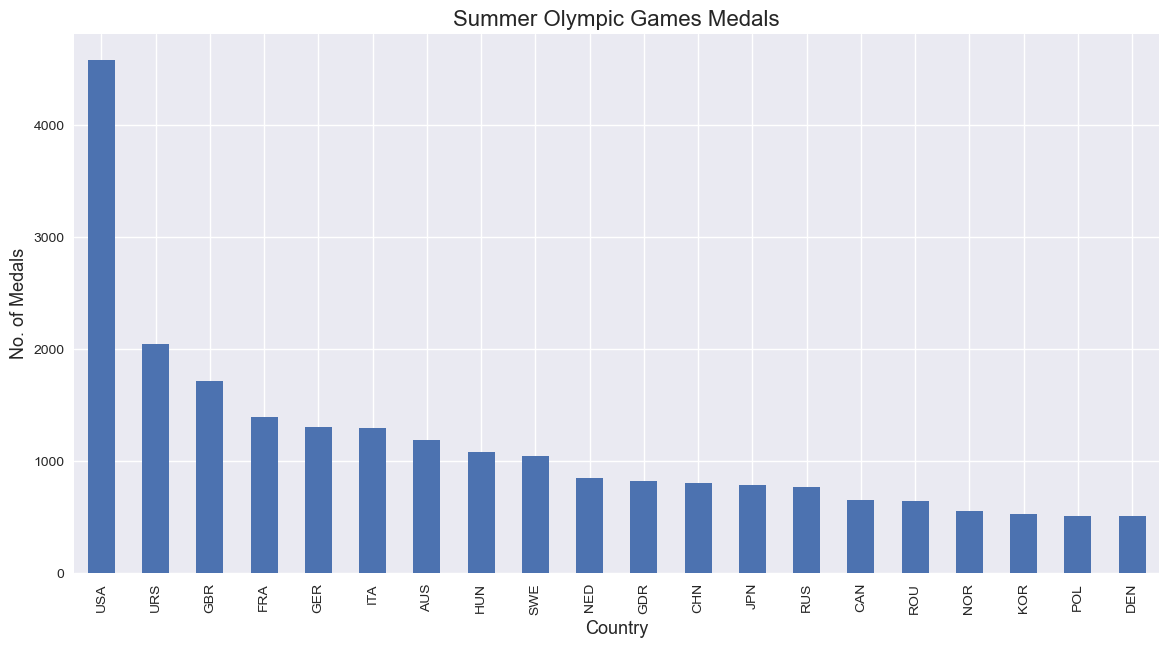

In [69]:
# data groupby country ,count of the column medal
# 20 largest values from the data
# plot the above data as a bar graph with labels

summer_medal_nlargest.plot(kind= 'bar', figsize= (14, 7))
plt.title('Summer Olympic Games Medals', fontsize= 16)
plt.xlabel('Country', fontsize= 13)
plt.ylabel('No. of Medals', fontsize= 13);

In [70]:
# data head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [71]:
# data gropuby sex and mean of the survived column

titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [72]:
# data gropuby pclass and mean of the survived column

titanic.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [73]:
# add column ad_chi with the value adult

titanic['ad_chi'] = 'adult'

In [74]:
# data head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [75]:
# value_counts of the column ad_chi

titanic['ad_chi'].value_counts()

ad_chi
adult    891
Name: count, dtype: int64

In [76]:
# change 

s = list(titanic.loc[titanic['age'] < 18,'ad_chi'].index)
titanic.iloc[s,9] = 'oooo'

In [77]:
# view filter data

titanic[titanic['age'] < 18]['ad_chi']

7      oooo
9      oooo
10     oooo
14     oooo
16     oooo
       ... 
850    oooo
852    oooo
853    oooo
869    oooo
875    oooo
Name: ad_chi, Length: 113, dtype: object

In [78]:
# in case of filter, change of value will only work with loc and iloc

titanic[titanic['age'] < 18]['ad_chi'].replace(to_replace= 'oooo', value= 'child', inplace= True)

C:\Users\Atharv Soni\AppData\Local\Temp\ipykernel_12124\3184502902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[titanic['age'] < 18]['ad_chi'].replace(to_replace= 'oooo', value= 'child', inplace= True)


In [80]:
# view filter data

titanic[titanic['age'] < 18]['ad_chi']

7      oooo
9      oooo
10     oooo
14     oooo
16     oooo
       ... 
850    oooo
852    oooo
853    oooo
869    oooo
875    oooo
Name: ad_chi, Length: 113, dtype: object

In [81]:
# change value by filtering data
# assigning value child who are below the age 18
# when change to be made in the value of the filter data, then loc and iloc will only work to make the changes


# titanic[titanic['age'] <18]['ad_chi'] = 'child'
# titanic.loc[titanic['age'] <18,:]['ad_chi'] = 'child'
# titanic.loc[titanic['age'] <18]['ad_chi'] = 'child'
titanic.loc[titanic['age'] < 18,'ad_chi'] = 'child'

In [82]:
# filter data

titanic[titanic['age'] < 18]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
9,1,2,female,14.0,1,0,30.0708,C,NaN,child
10,1,3,female,4.0,1,1,16.7000,S,G,child
14,0,3,female,14.0,0,0,7.8542,S,NaN,child
16,0,3,male,2.0,4,1,29.1250,Q,NaN,child
...,...,...,...,...,...,...,...,...,...,...
850,0,3,male,4.0,4,2,31.2750,S,NaN,child
852,0,3,female,9.0,1,1,15.2458,C,NaN,child
853,1,1,female,16.0,0,1,39.4000,S,D,child
869,1,3,male,4.0,1,1,11.1333,S,NaN,child


In [83]:
# mean of the column survived when data is group by ad_chi

titanic.groupby('ad_chi')['survived'].mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [84]:
# mean of the column survived when data is group by sex and ad_chi

titanic.groupby(['sex','ad_chi'])['survived'].mean()

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    adult     0.165703
        child     0.396552
Name: survived, dtype: float64

In [85]:
# count of the column survived when data is group by sex and ad_chi

titanic.groupby(['sex','ad_chi'])['survived'].count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [86]:
# mean of the column survived when data is group by sex and ad_chi
# sorting is done group wise

titanicmean_sa_sv = titanic.groupby(['sex','ad_chi'])['survived'].mean().sort_values(ascending= False)
titanicmean_sa_sv

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

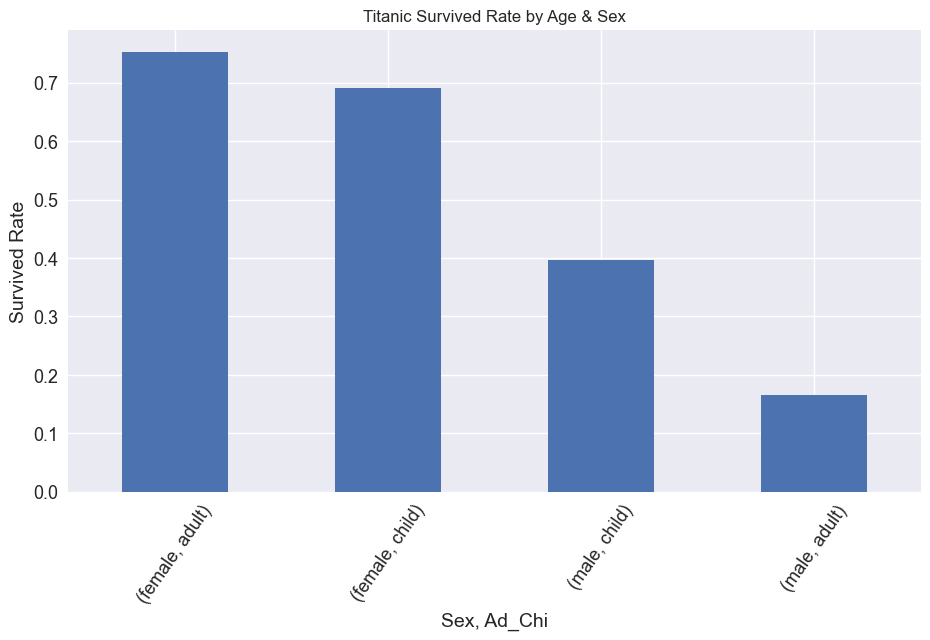

In [87]:
titanicmean_sa_sv.plot(kind= 'bar', fontsize= 13, figsize= (11,6), rot= 55)
plt.xlabel('Sex, Ad_Chi', fontsize= 14)
plt.title('Titanic Survived Rate by Age & Sex')
# plt.xticks(['Female Adult', 'Female Child', 'Male Adult', 'Male Child'])
plt.ylabel('Survived Rate', fontsize= 14);

In [88]:
# Sum of all the columns where groupby is with sex

titanic.groupby('sex').sum()

,survived,pclass,age,sibsp,parch,fare,embarked,deck,ad_chi
sex,,,,,,,,,
female,233,678,7286.00,218,204,13966.6628,CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...,CCGCBDBFCEFDCECBBGDDCGBCCDBCBECECBCECDBECFEDBD...,adultadultadultadultchildchildadultchildadulta...
male,109,1379,13919.17,248,136,14727.2865,SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...,EDACBCCFEADDCBDCBFBAFAFACCDCEBCADCCCCCFCECBECE...,adultadultadultadultchildadultadultchildadulta...


In [95]:
# agg() of all the columns where groupby with sex

titanic.groupby('sex').agg(['sum', 'count'])

survived       pclass             age       sibsp       parch        \
            sum count    sum count       sum count   sum count   sum count   
sex                                                                          
female      233   314    678   314   7286.00   261   218   314   204   314   
male        109   577   1379   577  13919.17   453   248   577   136   577   

              fare                                                 embarked  \
               sum count                                                sum   
sex                                                                           
female  13966.6628   314  CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...   
male    14727.2865   577  SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...   

                                                           deck        \
       count                                                sum count   
sex                                                                     
female   312  CCGCBDBFCEFDCECBBGDDCGBCCDBCBECECBCECDBECFEDBD...    97   
male     577  EDACBCCFEADDCBDCBFBAFAFACCDCEBCADCCCCCFCECBECE...   106   

                                                   ad_chi        
                                                      sum count  
sex                                                              
female  adultadultadultadultchildchildadultchildadulta...   314  
male    adultadultadultadultchildadultadultchildadulta...   577

In [96]:
# agg() of all the columns where groupby with sex

titanic.groupby('sex').agg({'survived': ['sum','mean'], 'pclass': ['mean'], 'age': ['mean','median'], 'fare': ['max']})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

In [97]:
# agg() of all the columns where groupby with sex

titanic.groupby('sex').agg(['sum','mean'])

TypeError: agg function failed [how->mean,dtype->object]

### Groupby aggrigation with relabeling

In [99]:
# data head

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [100]:
# mean of survived column by groupby('sex')

titanic.groupby('sex').agg(survival_rate = ('survived', 'mean'))

,survival_rate
sex,
female,0.742038
male,0.188908


In [101]:
# mean of survived and fare column by groupby('sex')

titanic.groupby('sex').agg(survival_rate = ('survived', 'mean'), fare_mean = ('fare', 'mean'))

,survival_rate,fare_mean
sex,,
female,0.742038,44.479818
male,0.188908,25.523893


In [102]:
# sum & mean of survived and mean of age column by groupby('sex')

titanic.groupby('sex').agg({'survived': ['sum', 'mean'], 'age': 'mean'})

survived                  age
            sum      mean       mean
sex                                 
female      233  0.742038  27.915709
male        109  0.188908  30.726645

In [103]:
# aggregate titanic dataframe groupby column sex
# find sum of survived and give it a name survived_total
# find mean of survived and give it a name survival_rate
# find mean of age and give it a name mean_age

titanic.groupby('sex').agg(survived_total = ('survived', 'sum'),survival_rate= ('survived', 'mean'), mean_age= ('age', 'mean'))

,survived_total,survival_rate,mean_age
sex,,,
female,233,0.742038,27.915709
male,109,0.188908,30.726645


### Transformation with transform()
`transform assign the value group wise`

In [104]:
# group the data fram by sex and pclass
# view survived column
# save the above data in a list

list(titanic.groupby(['sex','pclass'])['survived'])

[(('female', 1),
  1      1
  3      1
  11     1
  31     1
  52     1
        ..
  856    1
  862    1
  871    1
  879    1
  887    1
  Name: survived, Length: 94, dtype: int64),
 (('female', 2),
  9      1
  15     1
  41     0
  43     1
  53     1
        ..
  854    0
  865    1
  866    1
  874    1
  880    1
  Name: survived, Length: 76, dtype: int64),
 (('female', 3),
  2      1
  8      1
  10     1
  14     0
  18     0
        ..
  863    0
  875    1
  882    0
  885    0
  888    0
  Name: survived, Length: 144, dtype: int64),
 (('male', 1),
  6      0
  23     1
  27     0
  30     0
  34     0
        ..
  839    1
  857    1
  867    0
  872    0
  889    1
  Name: survived, Length: 122, dtype: int64),
 (('male', 2),
  17     1
  20     0
  21     1
  33     0
  70     0
        ..
  848    0
  861    0
  864    0
  883    0
  886    0
  Name: survived, Length: 108, dtype: int64),
 (('male', 3),
  0      0
  4      0
  5      0
  7      0
  12     0
        ..
  877

In [105]:
titanic.groupby(['sex','pclass'])['survived'].transform('mean')

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [110]:
# male pclass 3 mean

list(titanic.groupby(['sex','pclass'])['survived'])[5][1].mean()

0.13544668587896252

In [111]:
# group dataframe by sex and plclass
# view survived column
# then transform mean of the above data in new column name survived_rate_sp

titanic['survived_rate_sp'] = titanic.groupby(['sex','pclass'])['survived'].transform('mean')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,adult,0.968085
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,adult,0.968085
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult,0.135447


In [112]:
# create a new column by name outliers
# outliers will be absolute difference of columns survived and survived_rate_sp

titanic['outliers'] = abs(titanic['survived'] - titanic['survived_rate_sp'])
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult,0.135447,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,adult,0.968085,0.031915
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult,0.500000,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,adult,0.968085,0.031915
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult,0.135447,0.135447
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult,0.135447,0.135447
6,0,1,male,54.0,0,0,51.8625,S,E,adult,0.368852,0.368852
7,0,3,male,2.0,3,1,21.0750,S,NaN,child,0.135447,0.135447
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult,0.500000,0.500000
9,1,2,female,14.0,1,0,30.0708,C,NaN,child,0.921053,0.078947


In [113]:
# filter dataframe with outliers more than 0.85
 
titanic[titanic['outliers'] > 0.85]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers
36,1,3,male,NaN,0,0,7.2292,C,NaN,adult,0.135447,0.864553
41,0,2,female,27.00,1,0,21.0000,S,NaN,adult,0.921053,0.921053
65,1,3,male,NaN,1,1,15.2458,C,NaN,adult,0.135447,0.864553
74,1,3,male,32.00,0,0,56.4958,S,NaN,adult,0.135447,0.864553
81,1,3,male,29.00,0,0,9.5000,S,NaN,adult,0.135447,0.864553
107,1,3,male,NaN,0,0,7.7750,S,NaN,adult,0.135447,0.864553
125,1,3,male,12.00,1,0,11.2417,C,NaN,child,0.135447,0.864553
127,1,3,male,24.00,0,0,7.1417,S,NaN,adult,0.135447,0.864553
146,1,3,male,27.00,0,0,7.7958,S,NaN,adult,0.135447,0.864553
165,1,3,male,9.00,0,2,20.5250,S,NaN,child,0.135447,0.864553


### Replacing NaN values by group specific values (missing value imputation)

In [114]:
# data info

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          891 non-null    int64  
 1   pclass            891 non-null    int64  
 2   sex               891 non-null    object 
 3   age               714 non-null    float64
 4   sibsp             891 non-null    int64  
 5   parch             891 non-null    int64  
 6   fare              891 non-null    float64
 7   embarked          889 non-null    object 
 8   deck              203 non-null    object 
 9   ad_chi            891 non-null    object 
 10  survived_rate_sp  891 non-null    float64
 11  outliers          891 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 83.7+ KB


In [115]:
# find mean of column age

mean_age = titanic['age'].mean()
mean_age

29.69911764705882

In [116]:
# fill missing values with mean of the age 
# use fillna() method

titanic['age'].fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [117]:
# find mean of the age for titanic dataframe grouped by 'sex', 'pclass'

titanic.groupby(['sex', 'pclass'])['age'].mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [118]:
# Transform the age for titanic dataframe grouped by 'sex', 'pclass'
# and store it as a new column in the dataframe with a name 'mean_age_sp'


titanic['mean_age_sp'] = titanic.groupby(['sex', 'pclass'])['age'].transform('mean')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult,0.135447,0.135447,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,adult,0.968085,0.031915,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult,0.500000,0.500000,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,adult,0.968085,0.031915,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult,0.135447,0.135447,26.507589


In [119]:
# fill the missing values in 'age' column by transformed values in the 'mean_age_sp' column

titanic['age'].fillna(titanic['mean_age_sp'], inplace= True)
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
0,0,3,male,22.000000,1,0,7.2500,S,NaN,adult,0.135447,0.135447,26.507589
1,1,1,female,38.000000,1,0,71.2833,C,C,adult,0.968085,0.031915,34.611765
2,1,3,female,26.000000,0,0,7.9250,S,NaN,adult,0.500000,0.500000,21.750000
3,1,1,female,35.000000,1,0,53.1000,S,C,adult,0.968085,0.031915,34.611765
4,0,3,male,35.000000,0,0,8.0500,S,NaN,adult,0.135447,0.135447,26.507589
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,adult,0.135447,0.135447,26.507589
6,0,1,male,54.000000,0,0,51.8625,S,E,adult,0.368852,0.368852,41.281386
7,0,3,male,2.000000,3,1,21.0750,S,NaN,child,0.135447,0.135447,26.507589
8,1,3,female,27.000000,0,2,11.1333,S,NaN,adult,0.500000,0.500000,21.750000
9,1,2,female,14.000000,1,0,30.0708,C,NaN,child,0.921053,0.078947,28.722973


### generalizing split-apply-combine

In [120]:
# create a list of titanic groupby 'sex'

list(titanic.groupby('sex'))

[('female',
       survived  pclass     sex    age  sibsp  parch     fare embarked deck  \
  1           1       1  female  38.00      1      0  71.2833        C    C   
  2           1       3  female  26.00      0      0   7.9250        S  NaN   
  3           1       1  female  35.00      1      0  53.1000        S    C   
  8           1       3  female  27.00      0      2  11.1333        S  NaN   
  9           1       2  female  14.00      1      0  30.0708        C  NaN   
  ..        ...     ...     ...    ...    ...    ...      ...      ...  ...   
  880         1       2  female  25.00      0      1  26.0000        S  NaN   
  882         0       3  female  22.00      0      0  10.5167        S  NaN   
  885         0       3  female  39.00      0      5  29.1250        Q  NaN   
  887         1       1  female  19.00      0      0  30.0000        S    B   
  888         0       3  female  21.75      1      2  23.4500        S  NaN   
  
      ad_chi  survived_rate_sp  outli

In [121]:
# find mean of titanic groupby 'sex'

titanic.groupby('sex').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [122]:
# find first dataframe in the list of titanic groupby 'sex'
# store it in the variable 'female_titanic'

female_titanic = list(titanic.groupby('sex'))[0][1]
female_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
1,1,1,female,38.00,1,0,71.2833,C,C,adult,0.968085,0.031915,34.611765
2,1,3,female,26.00,0,0,7.9250,S,NaN,adult,0.500000,0.500000,21.750000
3,1,1,female,35.00,1,0,53.1000,S,C,adult,0.968085,0.031915,34.611765
8,1,3,female,27.00,0,2,11.1333,S,NaN,adult,0.500000,0.500000,21.750000
9,1,2,female,14.00,1,0,30.0708,C,NaN,child,0.921053,0.078947,28.722973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.00,0,1,26.0000,S,NaN,adult,0.921053,0.078947,28.722973
882,0,3,female,22.00,0,0,10.5167,S,NaN,adult,0.500000,0.500000,21.750000
885,0,3,female,39.00,0,5,29.1250,Q,NaN,adult,0.500000,0.500000,21.750000
887,1,1,female,19.00,0,0,30.0000,S,B,adult,0.968085,0.031915,34.611765


In [123]:
# find mean of 'female_titanic' 
# pass the parameter 'numeric_only= True' as mean can be find for numeric columns only
# otherwise it will throw the error in the future versions of pandas

female_titanic.mean(numeric_only= True)

survived             0.742038
pclass               2.159236
age                 27.288063
sibsp                0.694268
parch                0.649682
fare                44.479818
survived_rate_sp     0.742038
outliers             0.282997
mean_age_sp         27.288063
dtype: float64

In [124]:
# set titanic index name as 'titanic'
# set summer index name as 'summer'

titanic.index.name = 'titanic'
summer.index.name = 'summer'

In [125]:
# check index names for both dataframes 'titanic' and 'summer'

titanic.index.name, summer.index.name

('titanic', 'summer')

In [126]:
# write function that return dataframe mean
# name the function 'fun_mean'

def fun_mean(df):
    return df.mean(numeric_only= True)

In [127]:
# call function using for loop 
# pass 'titanic', 'summer' dataframes as a parameter
# print index name and output of 'fun_mean' function

for i in [titanic, summer]:
    print(i.index.name, '\n', fun_mean(i),'\n\n\n')

titanic 
 survived             0.383838
pclass               2.308642
age                 29.318643
sibsp                0.523008
parch                0.381594
fare                32.204208
survived_rate_sp     0.383838
outliers             0.286847
mean_age_sp         29.318643
dtype: float64 



summer 
 Year    1970.482785
dtype: float64 





In [128]:
# apply a function 'fun_mean' on titanic dataframe groupby 'sex'

titanic.groupby('sex').apply(fun_mean)

,survived,pclass,age,sibsp,parch,fare,survived_rate_sp,outliers,mean_age_sp
sex,,,,,,,,,
female,0.742038,2.159236,27.288063,0.694268,0.649682,44.479818,0.742038,0.282997,27.288063
male,0.188908,2.389948,30.423672,0.429809,0.235702,25.523893,0.188908,0.288942,30.423672


In [129]:
# find mean of titanic dataframe groupby 'sex'

titanic.groupby('sex').mean(numeric_only= True)

,survived,pclass,age,sibsp,parch,fare,survived_rate_sp,outliers,mean_age_sp
sex,,,,,,,,,
female,0.742038,2.159236,27.288063,0.694268,0.649682,44.479818,0.742038,0.282997,27.288063
male,0.188908,2.389948,30.423672,0.429809,0.235702,25.523893,0.188908,0.288942,30.423672


In [130]:
# find 5 rows of 'titanic' with 5 largest value for 'age' column

titanic.nlargest(n=5, columns='age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
titanic,,,,,,,,,,,,,
630,1,1,male,80.0,0,0,30.0000,S,A,adult,0.368852,0.631148,41.281386
851,0,3,male,74.0,0,0,7.7750,S,NaN,adult,0.135447,0.135447,26.507589
96,0,1,male,71.0,0,0,34.6542,C,A,adult,0.368852,0.368852,41.281386
493,0,1,male,71.0,0,0,49.5042,C,NaN,adult,0.368852,0.368852,41.281386
116,0,3,male,70.5,0,0,7.7500,Q,NaN,adult,0.135447,0.135447,26.507589


In [133]:
# find 5 rows of 'titanic' groupby 'sex' with 5 largest value for 'age' column
# nlargest works on dataframe only

titanic.groupby('sex').nlargest(n=5, columns='age')

AttributeError: 'DataFrameGroupBy' object has no attribute 'nlargest'

In [134]:
# write a function 'five_largest_val' which returns 5 rows with 5 largest value for 'age' column
# of dataframe with filter 'survived' == 1 

def five_largest_val(groupby_df):
    return groupby_df[groupby_df['survived'] == 1].nlargest(5, 'age')

In [136]:
five_largest_val(titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
titanic,,,,,,,,,,,,,
630,1,1,male,80.0,0,0,30.0000,S,A,adult,0.368852,0.631148,41.281386
275,1,1,female,63.0,1,0,77.9583,S,D,adult,0.968085,0.031915,34.611765
483,1,3,female,63.0,0,0,9.5875,S,NaN,adult,0.500000,0.500000,21.750000
570,1,2,male,62.0,0,0,10.5000,S,NaN,adult,0.157407,0.842593,30.740707
829,1,1,female,62.0,0,0,80.0000,NaN,B,adult,0.968085,0.031915,34.611765


In [135]:
# apply 'five_largest_val' function on titanic dataframe groupby 'sex' column

titanic.groupby('sex').apply(five_largest_val)

survived  pclass     sex   age  sibsp  parch     fare  \
sex    titanic                                                          
female 275             1       1  female  63.0      1      0  77.9583   
       483             1       3  female  63.0      0      0   9.5875   
       829             1       1  female  62.0      0      0  80.0000   
       366             1       1  female  60.0      1      0  75.2500   
       11              1       1  female  58.0      0      0  26.5500   
male   630             1       1    male  80.0      0      0  30.0000   
       570             1       2    male  62.0      0      0  10.5000   
       587             1       1    male  60.0      1      1  79.2000   
       647             1       1    male  56.0      0      0  35.5000   
       449             1       1    male  52.0      0      0  30.5000   

               embarked deck ad_chi  survived_rate_sp  outliers  mean_age_sp  
sex    titanic                                                                
female 275            S    D  adult          0.968085  0.031915    34.611765  
       483            S  NaN  adult          0.500000  0.500000    21.750000  
       829          NaN    B  adult          0.968085  0.031915    34.611765  
       366            C    D  adult          0.968085  0.031915    34.611765  
       11             S    C  adult          0.968085  0.031915    34.611765  
male   630            S    A  adult          0.368852  0.631148    41.281386  
       570            S  NaN  adult          0.157407  0.842593    30.740707  
       587            C    B  adult          0.368852  0.631148    41.281386  
       647            C    A  adult          0.368852  0.631148    41.281386  
       449            S    C  adult          0.368852  0.631148    41.281386

In [137]:
# filter data where sex is female and survived == 1 with only 5 largest values by age

female_titanic_5lardata = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]
ff = female_titanic_5lardata.nlargest(5,'age')
ff

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
titanic,,,,,,,,,,,,,
275,1,1,female,63.0,1,0,77.9583,S,D,adult,0.968085,0.031915,34.611765
483,1,3,female,63.0,0,0,9.5875,S,NaN,adult,0.500000,0.500000,21.750000
829,1,1,female,62.0,0,0,80.0000,NaN,B,adult,0.968085,0.031915,34.611765
366,1,1,female,60.0,1,0,75.2500,C,D,adult,0.968085,0.031915,34.611765
11,1,1,female,58.0,0,0,26.5500,S,C,adult,0.968085,0.031915,34.611765


In [138]:
# filter data where sex is male and survived == 1 with only 5 largest values by age

male_titanic_5lardata = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]
mm = male_titanic_5lardata.nlargest(5,'age')
mm

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi,survived_rate_sp,outliers,mean_age_sp
titanic,,,,,,,,,,,,,
630,1,1,male,80.0,0,0,30.0,S,A,adult,0.368852,0.631148,41.281386
570,1,2,male,62.0,0,0,10.5,S,NaN,adult,0.157407,0.842593,30.740707
587,1,1,male,60.0,1,1,79.2,C,B,adult,0.368852,0.631148,41.281386
647,1,1,male,56.0,0,0,35.5,C,A,adult,0.368852,0.631148,41.281386
449,1,1,male,52.0,0,0,30.5,S,C,adult,0.368852,0.631148,41.281386


In [139]:
# concat the data(female and male) and change index to sex and swaplevel to make sex 1st index

dd = pd.concat([ff, mm], ignore_index= False)
dd.set_index('sex', append= True).swaplevel()

survived  pclass   age  sibsp  parch     fare embarked deck  \
sex    titanic                                                                
female 275             1       1  63.0      1      0  77.9583        S    D   
       483             1       3  63.0      0      0   9.5875        S  NaN   
       829             1       1  62.0      0      0  80.0000      NaN    B   
       366             1       1  60.0      1      0  75.2500        C    D   
       11              1       1  58.0      0      0  26.5500        S    C   
male   630             1       1  80.0      0      0  30.0000        S    A   
       570             1       2  62.0      0      0  10.5000        S  NaN   
       587             1       1  60.0      1      1  79.2000        C    B   
       647             1       1  56.0      0      0  35.5000        C    A   
       449             1       1  52.0      0      0  30.5000        S    C   

               ad_chi  survived_rate_sp  outliers  mean_age_sp  
sex    titanic                                                  
female 275      adult          0.968085  0.031915    34.611765  
       483      adult          0.500000  0.500000    21.750000  
       829      adult          0.968085  0.031915    34.611765  
       366      adult          0.968085  0.031915    34.611765  
       11       adult          0.968085  0.031915    34.611765  
male   630      adult          0.368852  0.631148    41.281386  
       570      adult          0.157407  0.842593    30.740707  
       587      adult          0.368852  0.631148    41.281386  
       647      adult          0.368852  0.631148    41.281386  
       449      adult          0.368852  0.631148    41.281386

### Hierarchical Indexing(Multi-Indexing)

In [144]:
# read data

titanic_1 = pd.read_csv('Pandas_Data\\titanic.csv', usecols= ['survived', 'pclass', 'sex', 'age', 'fare'])
titanic_1.head(3)

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250


In [145]:
# find mean of dataframe 'titanic_1' groupby 'sex', 'pclass'
# store it in variable named 'mean_spc'

mean_spc = titanic_1.groupby(['sex', 'pclass']).mean()
mean_spc

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

In [146]:
# index

mean_spc.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [147]:
# view data at ('female',2) index and all columns data

mean_spc.loc[('female',2),:]

survived     0.921053
age         28.722973
fare        21.970121
Name: (female, 2), dtype: float64

In [148]:
# view data at ('female',2) index and age columns data

round(mean_spc.loc[('female',2),'age'],2)

28.72

In [149]:
# view data

mean_spc

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

### swaplevel()
`swaplevel does not work on 1 index`

>> - swaplevel swap(change position) of the last 2 index in the data

In [150]:
# Does not work on 1 index

titanic.swaplevel()

TypeError: Can only swap levels on a hierarchical axis.

In [151]:
# swaplevel of the data

mean_spc_swap = mean_spc.swaplevel()
mean_spc_swap

,,survived,age,fare
pclass,sex,,,
1,female,0.968085,34.611765,106.125798
2,female,0.921053,28.722973,21.970121
3,female,0.500000,21.750000,16.118810
1,male,0.368852,41.281386,67.226127
2,male,0.157407,30.740707,19.741782
3,male,0.135447,26.507589,12.661633


In [152]:
# index

mean_spc_swap.index

MultiIndex([(1, 'female'),
            (2, 'female'),
            (3, 'female'),
            (1,   'male'),
            (2,   'male'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [153]:
# swaplevel of the data and sort the index

mean_spc_sort = mean_spc.swaplevel().sort_index()
mean_spc_sort

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [154]:
# index

mean_spc_sort.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [155]:
# copy data

summercopy = summer.copy()
summercopy

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
summer,,,,,,,,,
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver


In [156]:
# set multi index and swaplevel()

w = summercopy.set_index(['Year', 'City','Country'], append= True)
w

,,,,Sport,Discipline,Athlete,Gender,Event,Medal
summer,Year,City,Country,,,,,,
0,1896,Athens,HUN,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold
1,1896,Athens,AUT,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100M Freestyle,Silver
2,1896,Athens,GRE,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,GRE,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100M Freestyle For Sailors,Gold
4,1896,Athens,GRE,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,POL,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",Men,Wg 84 KG,Bronze
31161,2012,London,IRI,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",Men,Wg 96 KG,Gold
31162,2012,London,RUS,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",Men,Wg 96 KG,Silver


In [157]:
w.index

MultiIndex([(    0, 1896, 'Athens', 'HUN'),
            (    1, 1896, 'Athens', 'AUT'),
            (    2, 1896, 'Athens', 'GRE'),
            (    3, 1896, 'Athens', 'GRE'),
            (    4, 1896, 'Athens', 'GRE'),
            (    5, 1896, 'Athens', 'GRE'),
            (    6, 1896, 'Athens', 'HUN'),
            (    7, 1896, 'Athens', 'GRE'),
            (    8, 1896, 'Athens', 'GRE'),
            (    9, 1896, 'Athens', 'AUT'),
            ...
            (31155, 2012, 'London', 'AZE'),
            (31156, 2012, 'London', 'LTU'),
            (31157, 2012, 'London', 'RUS'),
            (31158, 2012, 'London', 'EGY'),
            (31159, 2012, 'London', 'KAZ'),
            (31160, 2012, 'London', 'POL'),
            (31161, 2012, 'London', 'IRI'),
            (31162, 2012, 'London', 'RUS'),
            (31163, 2012, 'London', 'ARM'),
            (31164, 2012, 'London', 'SWE')],
           names=['summer', 'Year', 'City', 'Country'], length=31165)

In [158]:
w.swaplevel()

,,,,Sport,Discipline,Athlete,Gender,Event,Medal
summer,Year,Country,City,,,,,,
0,1896,HUN,Athens,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold
1,1896,AUT,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100M Freestyle,Silver
2,1896,GRE,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100M Freestyle For Sailors,Bronze
3,1896,GRE,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100M Freestyle For Sailors,Gold
4,1896,GRE,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,POL,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",Men,Wg 84 KG,Bronze
31161,2012,IRI,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",Men,Wg 96 KG,Gold
31162,2012,RUS,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",Men,Wg 96 KG,Silver


In [159]:
w

,,,,Sport,Discipline,Athlete,Gender,Event,Medal
summer,Year,City,Country,,,,,,
0,1896,Athens,HUN,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold
1,1896,Athens,AUT,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100M Freestyle,Silver
2,1896,Athens,GRE,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,GRE,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100M Freestyle For Sailors,Gold
4,1896,Athens,GRE,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,POL,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",Men,Wg 84 KG,Bronze
31161,2012,London,IRI,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",Men,Wg 96 KG,Gold
31162,2012,London,RUS,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",Men,Wg 96 KG,Silver


In [160]:
w.swaplevel(i= 1, j= -1)

,,,,Sport,Discipline,Athlete,Gender,Event,Medal
summer,Country,City,Year,,,,,,
0,HUN,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",Men,100M Freestyle,Gold
1,AUT,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100M Freestyle,Silver
2,GRE,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100M Freestyle For Sailors,Bronze
3,GRE,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100M Freestyle For Sailors,Gold
4,GRE,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,POL,London,2012,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",Men,Wg 84 KG,Bronze
31161,IRI,London,2012,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",Men,Wg 96 KG,Gold
31162,RUS,London,2012,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",Men,Wg 96 KG,Silver


In [164]:
w.swaplevel(i= 1, j= -1, axis= 1)

TypeError: Can only swap levels on a hierarchical axis.

### stack() & unstack()

`Stack do not work on series, works on dataframe only`<br>
`Unstack work on series when there are 2 or more index also it works on dataframe`

>> 1. unstack convert last index into columns <br>
>> 2. stack convert columns into the index

In [165]:
# data sample
# means random values from dataframe

summer.sample(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
summer,,,,,,,,,
23080,1996,Atlanta,Weightlifting,Weightlifting,"XIAO, Jiangang",CHN,Men,"59 - 64KG, Total (Featherweight)",Bronze
23245,2000,Sydney,Aquatics,Swimming,"THORPE, Ian",AUS,Men,200M Freestyle,Silver
17491,1984,Los Angeles,Handball,Handball,"DJURICA, Mirjana",YUG,Women,Handball,Gold
28171,2008,Beijing,Fencing,Fencing,"WARD, Becca",USA,Women,Sabre Individual,Bronze
1974,1912,Stockholm,Aquatics,Swimming,"FLETCHER, Jennie",GBR,Women,4X100M Freestyle Relay,Gold


In [166]:
summercopy.set_index(['Year', 'City'], append= True)

,,,Sport,Discipline,Athlete,Country,Gender,Event,Medal
summer,Year,City,,,,,,,
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver


In [167]:
# append 2 indexes and unstack them

summercopy.set_index(['Year', 'City'], append= True).unstack()

Sport                                                     \
City        Amsterdam Antwerp    Athens Atlanta Barcelona Beijing Berlin   
summer Year                                                                
0      1896       NaN     NaN  Aquatics     NaN       NaN     NaN    NaN   
1      1896       NaN     NaN  Aquatics     NaN       NaN     NaN    NaN   
2      1896       NaN     NaN  Aquatics     NaN       NaN     NaN    NaN   
3      1896       NaN     NaN  Aquatics     NaN       NaN     NaN    NaN   
4      1896       NaN     NaN  Aquatics     NaN       NaN     NaN    NaN   
...               ...     ...       ...     ...       ...     ...    ...   
31160  2012       NaN     NaN       NaN     NaN       NaN     NaN    NaN   
31161  2012       NaN     NaN       NaN     NaN       NaN     NaN    NaN   
31162  2012       NaN     NaN       NaN     NaN       NaN     NaN    NaN   
31163  2012       NaN     NaN       NaN     NaN       NaN     NaN    NaN   
31164  2012       NaN     NaN       NaN     NaN       NaN     NaN    NaN   

                                             ...    Medal                      \
City        Helsinki     London Los Angeles  ... Montreal Moscow Munich Paris   
summer Year                                  ...                                
0      1896      NaN        NaN         NaN  ...      NaN    NaN    NaN   NaN   
1      1896      NaN        NaN         NaN  ...      NaN    NaN    NaN   NaN   
2      1896      NaN        NaN         NaN  ...      NaN    NaN    NaN   NaN   
3      1896      NaN        NaN         NaN  ...      NaN    NaN    NaN   NaN   
4      1896      NaN        NaN         NaN  ...      NaN    NaN    NaN   NaN   
...              ...        ...         ...  ...      ...    ...    ...   ...   
31160  2012      NaN  Wrestling         NaN  ...      NaN    NaN    NaN   NaN   
31161  2012      NaN  Wrestling         NaN  ...      NaN    NaN    NaN   NaN   
31162  2012      NaN  Wrestling         NaN  ...      NaN    NaN    NaN   NaN   
31163  2012      NaN  Wrestling         NaN  ...      NaN    NaN    NaN   NaN   
31164  2012      NaN  Wrestling         NaN  ...      NaN    NaN    NaN   NaN   

                                                        
City        Rome Seoul St Louis Stockholm Sydney Tokyo  
summer Year                                             
0      1896  NaN   NaN      NaN       NaN    NaN   NaN  
1      1896  NaN   NaN      NaN       NaN    NaN   NaN  
2      1896  NaN   NaN      NaN       NaN    NaN   NaN  
3      1896  NaN   NaN      NaN       NaN    NaN   NaN  
4      1896  NaN   NaN      NaN       NaN    NaN   NaN  
...          ...   ...      ...       ...    ...   ...  
31160  2012  NaN   NaN      NaN       NaN    NaN   NaN  
31161  2012  NaN   NaN      NaN       NaN    NaN   NaN  
31162  2012  NaN   NaN      NaN       NaN    NaN   NaN  
31163  2012  NaN   NaN      NaN       NaN    NaN   NaN  
31164  2012  NaN   NaN      NaN       NaN    NaN   NaN  

[31165 rows x 154 columns]

In [168]:
# unstack dataframe

summercopy.unstack()

       summer
Year   0           1896
       1           1896
       2           1896
       3           1896
       4           1896
                  ...  
Medal  31160     Bronze
       31161       Gold
       31162     Silver
       31163     Bronze
       31164     Bronze
Length: 280485, dtype: object

In [169]:
# stack dataframe

summercopy.stack()

summer            
0       Year                    1896
        City                  Athens
        Sport               Aquatics
        Discipline          Swimming
        Athlete        HAJOS, Alfred
                           ...      
31164   Athlete       LIDBERG, Jimmy
        Country                  SWE
        Gender                   Men
        Event               Wg 96 KG
        Medal                 Bronze
Length: 280481, dtype: object

In [170]:
# type of stack data

type(summercopy.stack())

pandas.core.series.Series

In [171]:
# type of madeal column data

type(summercopy['Medal'])

pandas.core.series.Series

In [172]:
# Medal column data

summercopy['Medal']

summer
0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
31160    Bronze
31161      Gold
31162    Silver
31163    Bronze
31164    Bronze
Name: Medal, Length: 31165, dtype: object

In [316]:
# slicing

# summercopy.stack().head(60)
summercopy.stack().head(60)[3]

Year                                1896
City                              Athens
Sport                           Aquatics
Discipline                      Swimming
Athlete               MALOKINIS, Ioannis
Country                              GRE
Gender                               Men
Event         100M Freestyle For Sailors
Medal                               Gold
dtype: object

In [173]:
# stack the dataframe then again unstack the data

summercopy.stack().unstack()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
summer,,,,,,,,,
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver


In [174]:
# unstack do not work on series where there is 1 index only

summercopy['Medal'].unstack()

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.range.RangeIndex'> was passed

In [175]:
# unstack do not work on series where there is 1 index only

summercopy['Medal'].stack()

AttributeError: 'Series' object has no attribute 'stack'

In [177]:
# 

summercopy.unstack()

       summer
Year   0           1896
       1           1896
       2           1896
       3           1896
       4           1896
                  ...  
Medal  31160     Bronze
       31161       Gold
       31162     Silver
       31163     Bronze
       31164     Bronze
Length: 280485, dtype: object

In [176]:
# stack do not work on series

summercopy.unstack().stack()

AttributeError: 'Series' object has no attribute 'stack'

In [178]:
# count the medal data where data is groupby country and medal

medal_by_country = summer.groupby(['Country', 'Medal'])['Medal'].count()
medal_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [179]:
# type

type(medal_by_country)

pandas.core.series.Series

In [180]:
medal_by_country.index

MultiIndex([('AFG', 'Bronze'),
            ('AHO', 'Silver'),
            ('ALG', 'Bronze'),
            ('ALG',   'Gold'),
            ('ALG', 'Silver'),
            ('ANZ', 'Bronze'),
            ('ANZ',   'Gold'),
            ('ANZ', 'Silver'),
            ('ARG', 'Bronze'),
            ('ARG',   'Gold'),
            ...
            ('YUG',   'Gold'),
            ('YUG', 'Silver'),
            ('ZAM', 'Bronze'),
            ('ZAM', 'Silver'),
            ('ZIM', 'Bronze'),
            ('ZIM',   'Gold'),
            ('ZIM', 'Silver'),
            ('ZZX', 'Bronze'),
            ('ZZX',   'Gold'),
            ('ZZX', 'Silver')],
           names=['Country', 'Medal'], length=347)

In [181]:
# view data of USA(index 1)

medal_by_country.loc[('USA')]

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

In [183]:
# view gold medal of USA (index1,2)

medal_by_country.loc[('USA', 'Gold')]

2235

In [184]:
# view data

medal_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [185]:
# unstack the data
# unstack means convert the column back to index

medal_by_country_unstack = medal_by_country.unstack()
medal_by_country_unstack

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [186]:
medal_by_country.unstack(level= 0)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


In [187]:
# fill NaN values with 0 by fillna

medal_by_country_unstack.fillna(0, inplace= True)
medal_by_country_unstack

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,0.0,0.0
AHO,0.0,0.0,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,0.0,0.0,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,0.0,1.0


In [188]:
# fill NaN values with 0 by unstack parameter fill_value= 0

medal_by_country.unstack(fill_value= 0)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99
...,...,...,...
VIE,0,0,2
YUG,118,143,174
ZAM,1,0,1


In [189]:
# change the sequence of the columns 

medal_by_country_unstack = medal_by_country_unstack[['Gold', 'Silver', 'Bronze']]
medal_by_country_unstack

Medal,Gold,Silver,Bronze
Country,,,
AFG,0.0,0.0,2.0
AHO,0.0,1.0,0.0
ALG,5.0,2.0,8.0
ANZ,20.0,4.0,5.0
ARG,69.0,99.0,91.0
...,...,...,...
VIE,0.0,2.0,0.0
YUG,143.0,174.0,118.0
ZAM,0.0,1.0,1.0


In [190]:
# sort values of the data by ['Gold','Silver','Bronze']

medal_by_country_unstack.sort_values(by= ['Gold','Silver','Bronze'], ascending= False, inplace= True)
medal_by_country_unstack

Medal,Gold,Silver,Bronze
Country,,,
USA,2235.0,1252.0,1098.0
URS,838.0,627.0,584.0
GBR,546.0,621.0,553.0
ITA,476.0,416.0,404.0
GER,452.0,378.0,475.0
...,...,...,...
IRQ,0.0,0.0,1.0
MKD,0.0,0.0,1.0
MRI,0.0,0.0,1.0


In [193]:
import matplotlib.pyplot as plt
plt.style.use('fast')

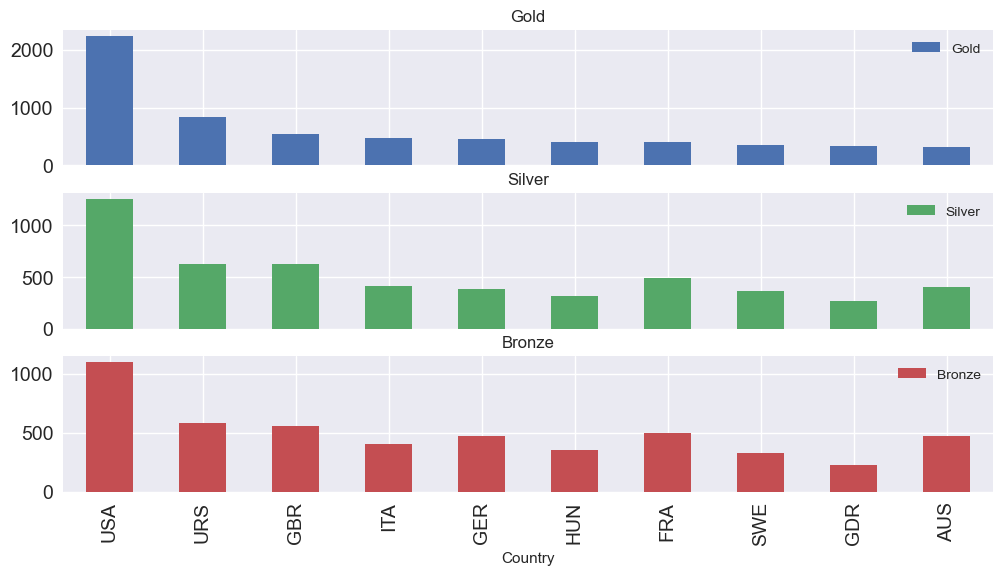

In [194]:
# plot the data on a bar graph

medal_by_country_unstack.head(10).plot(kind= 'bar', figsize= (12,6), fontsize= 14, subplots= True);

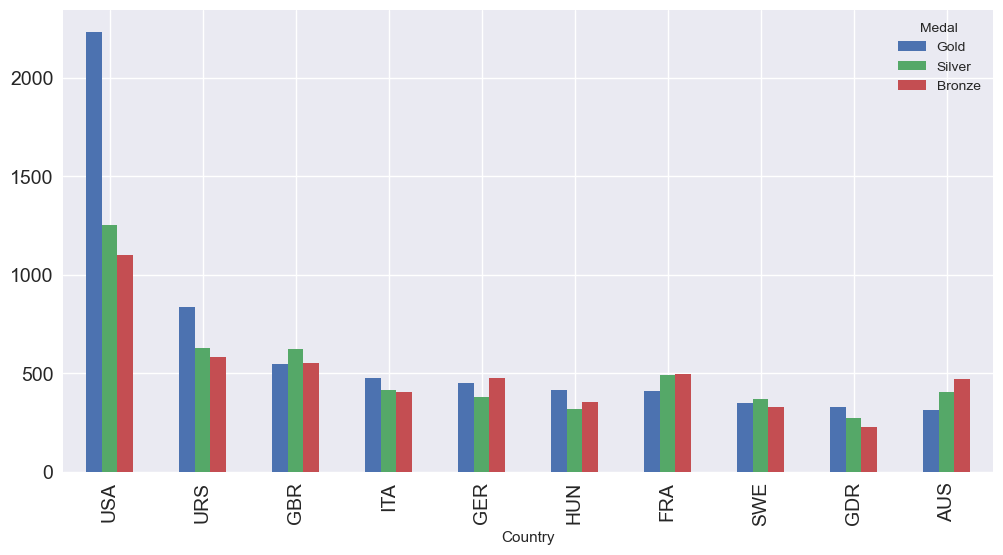

In [196]:
# plot the data on a bar graph

medal_by_country_unstack.head(10).plot(kind= 'bar', figsize= (12,6), fontsize= 14);

In [197]:
# view data

medal_by_country_unstack

Medal,Gold,Silver,Bronze
Country,,,
USA,2235.0,1252.0,1098.0
URS,838.0,627.0,584.0
GBR,546.0,621.0,553.0
ITA,476.0,416.0,404.0
GER,452.0,378.0,475.0
...,...,...,...
IRQ,0.0,0.0,1.0
MKD,0.0,0.0,1.0
MRI,0.0,0.0,1.0


In [198]:
# stack the data
# means convert columns back to index

medal_by_country_unstack.stack()

Country  Medal 
USA      Gold      2235.0
         Silver    1252.0
         Bronze    1098.0
URS      Gold       838.0
         Silver     627.0
                    ...  
NIG      Silver       0.0
         Bronze       1.0
TOG      Gold         0.0
         Silver       0.0
         Bronze       1.0
Length: 441, dtype: float64

In [199]:
# stack the data then unstack the data
# first convert columns back to index
# and again convert index into columns

medal_by_country_unstack.stack().unstack()

Medal,Gold,Silver,Bronze
Country,,,
USA,2235.0,1252.0,1098.0
URS,838.0,627.0,584.0
GBR,546.0,621.0,553.0
ITA,476.0,416.0,404.0
GER,452.0,378.0,475.0
...,...,...,...
IRQ,0.0,0.0,1.0
MKD,0.0,0.0,1.0
MRI,0.0,0.0,1.0
